# This notebook is made for the sampling problems

## Single Sample hypothesis test

 **Choosing a Sampling Plan with a given OC Curve**

The probability of observing exactly d defectives is given by:

$P_d = f(d) = \frac{n!}{d!(n-d)!} \cdot{p^d}\cdot{(1-p)}^{(n-d)}$ 

Using this formula with $n=52,\ c=3,\ and\ p=0.01,0.02,…,0.12$, which means that we default believe $P_d = p$.

The probability of acceptance is the probability that d, the number of defectives, is less than or equal to c, the accept number. This means that:

$P_a = P(d\le c) = \sum_{d=0}^{c}\frac{n!}{d!(n-d)!} \cdot{p^d}\cdot{(1-p)}^{(n-d)}$, then we find:

In [56]:
import numpy as np
import pandas as pd
p_list = []
for i in range (1,13):
    p_list.append(i/100)
p_d_list = []
p_a_list = []
for i in range (0,len(p_list)):
    #p_d = sum(np.random.binomial(52,p_list[i],50000)==3)/50000
    accpet_0_def = sum(np.random.binomial(52,p_list[i],50000)==0)
    accpet_1_def = sum(np.random.binomial(52,p_list[i],50000)==1)
    accpet_2_def =sum(np.random.binomial(52,p_list[i],50000)==2)
    accpet_3_def =sum(np.random.binomial(52,p_list[i],50000)==3)
    p_a = (accpet_0_def+accpet_1_def+accpet_2_def+accpet_3_def)/50000 
    p_a_list.append(p_a)
   # p_a_list.append(p_a)
p_dic = {'P_a':p_a_list,'P_d':p_list}
df =pd.DataFrame(p_dic)
df

,P_a,P_d
0,0.99694,0.01
1,0.98630,0.02
2,0.93166,0.03
3,0.83956,0.04
4,0.73732,0.05
5,0.61846,0.06
6,0.50388,0.07
7,0.39260,0.08
8,0.29974,0.09
9,0.22178,0.10


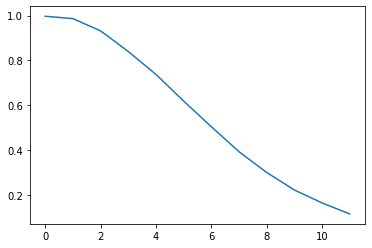

In [57]:
import matplotlib.pyplot as plt 
plt.plot( p_a_list)

We define $\alpha$ and $\beta$ as following:

$1-\alpha = \sum_{d=0}^{c}\frac{n!}{d!(n-d)!} \cdot{p^{d}_{1}}\cdot{(1-p_{1})}^{(n-d)}$

$\beta = \sum_{d=0}^{c}\frac{n!}{d!(n-d)!} \cdot{p^{d}_{2}}\cdot{(1-p_2)}^{(n-d)}$

$p_1$ is a percent defective that is the base line requirement for the quality of the producer's product.

$p_2$is a designated high defect level that would be unacceptable to the consumer.

In [61]:
alpha_list = []
for i in range (0,len(p_a_list)):
    alpha_list.append(1 - p_a_list[i])
p_dic['alpha'] = alpha_list
df =pd.DataFrame(p_dic)
df

,P_a,P_d,alpha
0,0.99694,0.01,0.00306
1,0.98630,0.02,0.01370
2,0.93166,0.03,0.06834
3,0.83956,0.04,0.16044
4,0.73732,0.05,0.26268
5,0.61846,0.06,0.38154
6,0.50388,0.07,0.49612
7,0.39260,0.08,0.60740
8,0.29974,0.09,0.70026
9,0.22178,0.10,0.77822


**Average Outgoing Quality (AOQ)**

AOQ can be understood as the defective proportion after we exclude the defective by using single sampling 

$AOQ = \frac{p_a \cdot p \cdot {(N-n)}}{N}$

We assume that$ N=10000,\ n=52,\ c=3,$

In [66]:
aoq_list = []
for i in range (0,len(p_a_list)):
    aoq = (p_a_list[i]*p_list[i]*(10000-52))/10000
    aoq_list.append(aoq)
p_dic['AOQ'] = aoq_list
df =pd.DataFrame(p_dic)
df

,P_a,P_d,alpha,AOQ
0,0.99694,0.01,0.00306,0.009918
1,0.98630,0.02,0.01370,0.019623
2,0.93166,0.03,0.06834,0.027804
3,0.83956,0.04,0.16044,0.033408
4,0.73732,0.05,0.26268,0.036674
5,0.61846,0.06,0.38154,0.036915
6,0.50388,0.07,0.49612,0.035088
7,0.39260,0.08,0.60740,0.031245
8,0.29974,0.09,0.70026,0.026836
9,0.22178,0.10,0.77822,0.022063


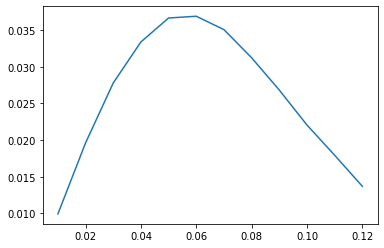

In [67]:
plt.plot( p_list, aoq_list)

Our conclusion is that when $N \gg n$, then we can find that $AOQ \approx P_a \cdot p$

**The Average Total Inspection (ATI)**

What is the total amount of inspection when rejected lots are screened?

$ATI = n + (1-P_a)(N-n)$

In [70]:
ati_list = []
for i in range (0,len(p_a_list)):
    ati = 52 + ((1 -p_a_list[i])*(10000-52))
    ati_list.append(ati)
p_dic['ATI'] = ati_list
df =pd.DataFrame(p_dic)
df

,P_a,P_d,alpha,AOQ,ATI
0,0.99694,0.01,0.00306,0.009918,82.44088
1,0.98630,0.02,0.01370,0.019623,188.28760
2,0.93166,0.03,0.06834,0.027804,731.84632
3,0.83956,0.04,0.16044,0.033408,1648.05712
4,0.73732,0.05,0.26268,0.036674,2665.14064
5,0.61846,0.06,0.38154,0.036915,3847.55992
6,0.50388,0.07,0.49612,0.035088,4987.40176
7,0.39260,0.08,0.60740,0.031245,6094.41520
8,0.29974,0.09,0.70026,0.026836,7018.18648
9,0.22178,0.10,0.77822,0.022063,7793.73256


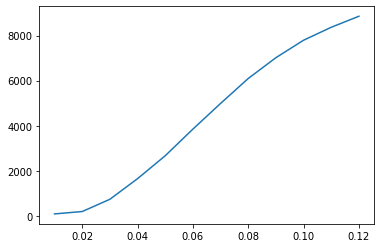

In [71]:
plt.plot( p_list, ati_list)

## Double Sample test